In [1]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
import nibabel as nib
import numpy.ma as ma
from numpy import savetxt
import os
import umap.umap_ as umap

In [2]:
#input variables and path defs
workDir = '/host/percy/local_raid/hans/amyg/struct/'
outDir = str(workDir+'outputs/')
volDir = str(workDir+'volumes/')


In [3]:
##### run all the umap embeddings for all subjects at once #####

for i in [1,4,5,6,7,9,10,11,12,13]:
    if i <10:
        sub=str('PNC00'+str(i))
    else:
        sub=str('PNC0'+str(i))
    print(sub)
    ses='01'
    side='right'
    side2='R'

    os.chdir(outDir)
    df=pd.read_csv(outDir+sub+'_'+ses+'features_'+side2+'/cropped_featurebank_1sd.csv',header=None)

    path = str(outDir +sub+'_'+ses+'_'+side2+'_embedding_1sd.csv')

    reducer = umap.UMAP(n_neighbors=15, min_dist=0.1)

    feature_data = df.values
    scaled_feature_data = StandardScaler().fit_transform(feature_data)

    embedding = reducer.fit_transform(scaled_feature_data)

    #savetxt(path,embedding, delimiter=',')


PNC001


/export02/data/jessica/miniconda3/envs/python37/lib/python3.7/site-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


PNC004
PNC005
PNC006
PNC007
PNC009
PNC010
PNC011
PNC012
PNC013


In [5]:
print(embedding.shape)

(6505, 2)


In [46]:
#path = str(res+'umUMAPembeddings_'+side+'/embedding_nn'+str(nn)+'_md'+str(md)+'.csv')
#savetxt(path,embedding, delimiter=',')

In [6]:
sub='PNC011'
ses='01'
side2='L'
workDir = '/host/percy/local_raid/hans/amyg/struct/'
outDir = str(workDir+'outputs/')
path = str(outDir +sub+'_'+ses+'_'+side2+'_embedding_1sd.csv')
#path=str(regDir+sub+'_'+ses+'_amyg_umap_embeddings_MNI152Space_1sd.csv')
embedding=np.loadtxt(path,delimiter=',')

<function matplotlib.pyplot.show(close=None, block=None)>

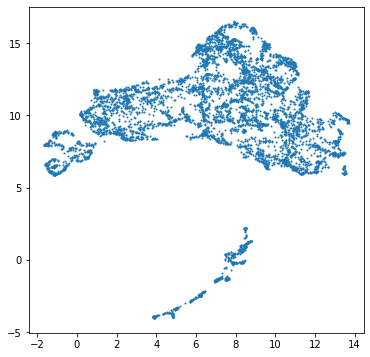

In [7]:
#project UMAP embeddings as scatter plot
embedding=embedding
plt.figure(figsize=(6,6))
plt.scatter(
    embedding[:, 1],
    embedding[:, 0],
    #c = rgb[:],
    #cmap='Spectral',
    s=1)
#plt.colorbar(boundaries=[0.5,1.5,2.5,3.5,4.5]).set_ticks([1,2,3,4])
plt.show
#plt.savefig(str('/home/bic/hauer/Desktop/'+sub+'_UMAP_1sd.png'))

In [8]:
#delete all values where target is 0
zeros=[]
for i,val in enumerate(target):
    if val == 0:
        zeros.append(i)
print(len(target))
target = np.delete(target,zeros)
embedding = np.delete(embedding,zeros,0)
print(len(target))
os.chdir(outDir)
#path=str(res+'um_prob_prctile_all_overlap_'+side+'.csv')
#savetxt(outDir+'embed_test_'+res+target_file+side+'.csv',target, delimiter=',')
#savetxt(outDir+res+target_file+'_'+side+'.csv',target, delimiter=',')
#print(target)

NameError: name 'target' is not defined

In [389]:
print(rgb[:5])



[[0.         0.57142857 0.63398693]
 [0.         0.57142857 0.64052288]
 [0.         0.58333333 0.62745098]
 [0.         0.58333333 0.63398693]
 [0.         0.58333333 0.64052288]]


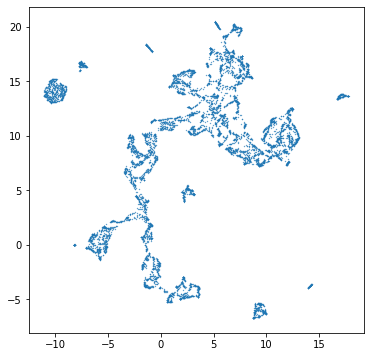

In [10]:
#project UMAP embeddings as scatter plot
embedding=embedding
plt.figure(figsize=(6,6))
plt.scatter(
    embedding[:, 1],
    embedding[:, 0],
    #c = rgb[:],
    #cmap='Spectral',
    s=.1)
#plt.colorbar(boundaries=[0.5,1.5,2.5,3.5,4.5]).set_ticks([1,2,3,4])
plt.show
#plt.savefig("amyg_L_UMAP_clrspctrm.png")
#plt.gca().set_aspect('equal', 'datalim')
#plt.xlim(-5.5,7)
#plt.ylim(-0.5,17.5)
#plt.title('UMAP projection of the amygdala', fontsize=20)

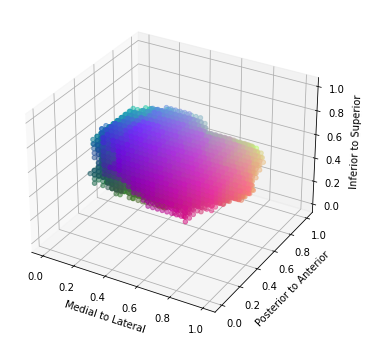

In [55]:
plt.rcParams["figure.figsize"] = [12, 6]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#z, x, y = data.nonzero()
ax.scatter(rgb[:,0], rgb[:,1], rgb[:,2], c=rgb[:], alpha=0.5)
ax.set_xlabel('Medial to Lateral')
ax.set_ylabel('Posterior to Anterior')
ax.set_zlabel('Inferior to Superior')
plt.show()

In [ ]:
#ending here#####

In [ ]:
#calculate the silhouette score
from sklearn.metrics import *

embedding = embedBank[1]
score= silhouette_score(embedding,target,metric='euclidean')
print(score)

In [ ]:
sscores = []
for i in range(len(embedBank)):
    print(i)
    embedding = embedBank[i]
    sscores.append(silhouette_score(embedding,target,metric='euclidean'))

In [ ]:
#plot for to find hyperparameter values with best silhouette scores
#print(tmpscore)

ind=[i for i in range(len(tmpscore))]

plt.plot(ind,tmpscore)
plt.xlabel('hyperparam')
plt.ylabel('silhouette score')
plt.show()

In [ ]:
max_index = max(sscores)
print(sscores.index(max_index))
print('best score is for min_dist=.1 and spread=1 at score '+str(max_index))

In [ ]:
#retrieve all the silhouette info
os.chdir(workDir3+'outputs/')
sil_scores=[]
file = open('silhouette_results.csv','r+')

string = file.read()

print(string)

        

In [ ]:
import csv
from operator import itemgetter
def no_blank(fd):
    try:
        while True:
            line = next(fd)
            if len(line.strip()) != 0:
                yield line
    except:
        return

results=[]
with open('silhouette_results.csv',newline='') as csvfile:
    
    reader = csv.reader(csvfile)

    for row in reader:
        results.append(row)

results.sort(key=lambda row: (int(row[0]),float(row[1])))
#print(results)
#nn=[5:5:100]
min_dist=[0.001,0.0025,0.005,0.0075,0.01,0.025,0.05,0.075,0.1,0.25,0.5,0.75,1]
matrix=np.zeros((20,13))
print(matrix)
for i,row in enumerate(results):
    if float(row[1])==min_dist[0]:
        nn=int(row[0])/5
        matrix[nn,0]=float(row[2])
    elif float(row[1])==min_dist[1]:
        nn=int(row[0])/5
        matrix[nn,1]=float(row[2])
    elif float(row[1])==min_dist[2]:
        nn=int(row[0])/5
        matrix[nn,2]=float(row[2])
    elif float(row[1])==min_dist[3]:
        nn=int(row[0])/5
        matrix[nn,3]=float(row[2])
    elif float(row[1])==min_dist[4]:
        nn=int(row[0])/5
        matrix[nn,4]=float(row[2])
    elif float(row[1])==min_dist[5]:
        nn=int(row[0])/5
        matrix[nn,5]=float(row[2])
    elif float(row[1])==min_dist[6]:
        nn=int(row[0])/5
        matrix[nn,6]=float(row[2])
    elif float(row[1])==min_dist[7]:
        nn=int(row[0])/5
        matrix[nn,7]=float(row[2])
    elif float(row[1])==min_dist[8]:
        nn=int(row[0])/5
        matrix[nn,8]=float(row[2])
    elif float(row[1])==min_dist[9]:
        nn=int(row[0])/5
        matrix[nn,9]=float(row[2])
    elif float(row[1])==min_dist[10]:
        nn=int(row[0])/5
        matrix[nn,10]=float(row[2])
    elif float(row[1])==min_dist[11]:
        nn=int(row[0])/5
        matrix[nn,11]=float(row[2])
    elif float(row[1])==min_dist[12]:
        nn=int(row[0])/5
        matrix[nn,12]=float(row[2])


In [ ]:
#plot for to find hyperparameter values with best silhouette scores
#print(tmpscore)
scores=[float(row[2]) for row in results]
nn=[float(row[0]) for row in results]
min_dist=[float(row[1]) for row in results]

plt.figure(figsize=(10,10))
plt.scatter(nn,scores,c=min_dist)
plt.xlabel('NN')
plt.ylabel('silhouette score')
plt.colorbar().set_label('min_dist',rotation=270)

plt.show()

In [ ]:
scores=[float(row[2]) for row in results]
nn=[float(row[0]) for row in results]
min_dist=[float(row[1]) for row in results]
data = np.random.random((10,10))
print(type(data))
print((nn, min_dist))
plt.imshow(results)
plt.colorbar()
plt.show

In [ ]:
embedding = embed_list[0]
plt.scatter(
    embedding[:, 1],
    embedding[:, 0],
    c=target,cmap='Spectral',
    s=.001)
plt.colorbar(boundaries=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]).set_ticks([1,2,3,4,5,6])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the amygdala', fontsize=20)

In [ ]:
#print(len(embedding[100]))
print(embed_list)

In [ ]:
reducer6 = umap.UMAP(n_neighbors=100000)
feature_data6 = df[['mean6','variance6','skewness6','kurtosis6']].values
scaled_feature_data6 = StandardScaler().fit_transform(feature_data6)

embedding6 = reducer.fit_transform(scaled_feature_data6)
embedding6.shape

In [ ]:
embedding=embedBank[156]
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=target,cmap='Spectral',
    s=.001)
plt.colorbar(boundaries=[0.5,1.5,2.5,3.5,4.5,5.5,6.5]).set_ticks([1,2,3,4,5,6])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the amygdala', fontsize=20)

In [ ]:
print(embedBank)

In [ ]:
print(embedding)